In [1]:
## The methods used for this assignment can be found from scipy's documentation:
## https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

import math
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

Use scipy.stats to create a random variable A, which follows a Normal distribution A∼N(μ=5,σ**2=10) 

In [2]:
mean = 5
sd = math.sqrt(10)
A = stats.norm(loc=mean, scale=sd)

Using A, find the probability density at a single point, say a=4. 

In [3]:
#Probability density at p1(i.e. a)      
p1 =4
res_1 = A.pdf(p1)

print("Probability density at 4 is", res_1)

Probability density at 4 is 0.12000389484301362


Using A, find the cumulative density at the mean. 

In [4]:
res_2 = A.cdf(5)

print("Probability density at the mean is", res_2)      

Probability density at the mean is 0.5


Using A, generate 10 random samples. 

In [5]:
samples = A.rvs(size=10)
samples.sort()
res_3 = samples

print("Random samples from A", res_3) 

Random samples from A [0.32114696 0.62080744 2.16336961 3.93050527 4.49850129 6.53304434
 7.40798355 7.51194862 8.24575031 9.39265233]


Plot the pdf given by A

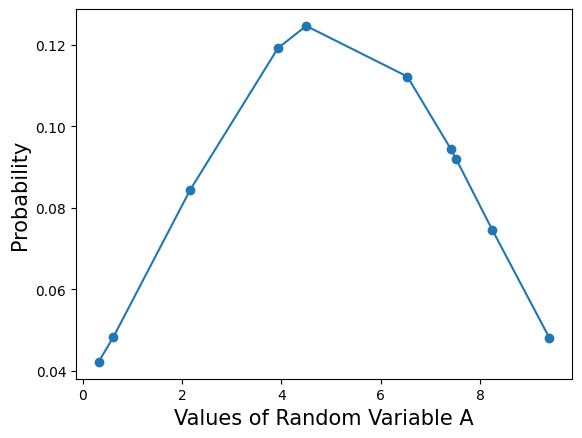

In [6]:
x =  samples
y =  A.pdf(samples)
plt.plot(x, y)
plt.scatter(x, y)
plt.xlabel('Values of Random Variable A', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.show()

From Wikipedia :In statistics, the 68–95–99.7 rule, also known as the empirical rule, is a shorthand used to remember the percentage of values that lie within an interval estimate in a normal distribution: 68%, 95%, and 99.7% of the values lie within one, two, and three standard deviations of the mean, respectively.

Verify the same using the above distribution. Mark the interval on the plot as well.

Hint : Use scipy.integrate

probability to fall between 1.8377223398316205 and 8.16227766016838 : (0.6826894921370861, 7.579375928402477e-15)
probability to fall between -1.324555320336759 and 11.32455532033676 : (0.9544997361036418, 1.8403551142453682e-11)
probability to fall between -4.486832980505138 and 14.486832980505138 : (0.9973002039367399, 1.1072256503105314e-14)


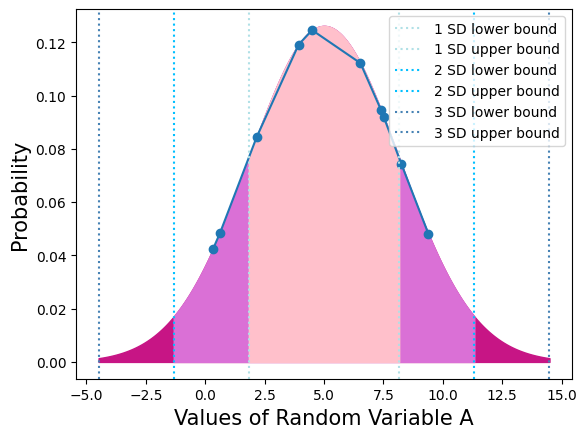

In [7]:
import scipy.integrate as integrate

## one standard diviation
x1 = mean-sd
x2 = mean+sd

## two standard diviation
x3 = mean-sd*2
x4 = mean+sd*2

## three standard diviation
x5 = mean-sd*3
x6 = mean+sd*3

prob_sd_1 = integrate.quad(A.pdf,x1,x2)
prob_sd_2 = integrate.quad(A.pdf,x3,x4)
prob_sd_3 = integrate.quad(A.pdf,x5,x6)

print('probability to fall between {0} and {1} :'.format(x1, x2), prob_sd_1)
print('probability to fall between {0} and {1} :'.format(x3, x4), prob_sd_2)
print('probability to fall between {0} and {1} :'.format(x5, x6), prob_sd_3)


needed_x_1 = np.linspace(x1, x2, 1000)
needed_y_1 = A.pdf(needed_x_1)

needed_x_2 = np.linspace(x3, x4, 1000)
needed_y_2 = A.pdf(needed_x_2)

needed_x_3 = np.linspace(x5, x6, 1000)
needed_y_3 = A.pdf(needed_x_3)

plt.fill_between(needed_x_3, needed_y_3, color='mediumvioletred')
plt.fill_between(needed_x_2, needed_y_2, color='orchid')
plt.fill_between(needed_x_1, needed_y_1, color='pink')
plt.plot(x, y)
plt.scatter(x, y)

plt.axvline(x=x1, color='powderblue', linestyle='dotted', label='1 SD lower bound')
plt.axvline(x=x2, color='powderblue', linestyle='dotted', label='1 SD upper bound')

plt.axvline(x=x3, color='deepskyblue', linestyle='dotted', label='2 SD lower bound')
plt.axvline(x=x4, color='deepskyblue', linestyle='dotted', label='2 SD upper bound')

plt.axvline(x=x5, color='steelblue', linestyle='dotted', label='3 SD lower bound')
plt.axvline(x=x6, color='steelblue', linestyle='dotted', label='3 SD upper bound')

plt.xlabel('Values of Random Variable A', fontsize=15)
plt.ylabel('Probability', fontsize=15)

plt.legend()
plt.show()

## Explaination for the last part
To verify the statement from wikipedia, one, two and three standard diviations were used to find the probability of a random value falling within this range. The linspace was used to vizualize the normal distribution, but if I had added more random samples, we would have seen the same result. From this part we can verify that we fall within the given probabilities from Wikipedia.